# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [77]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


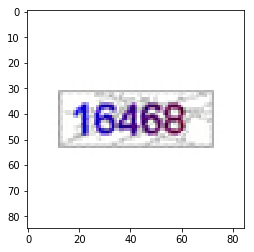

In [79]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('3.gif')

plt.imshow(img) 

## Apply PCA on face image

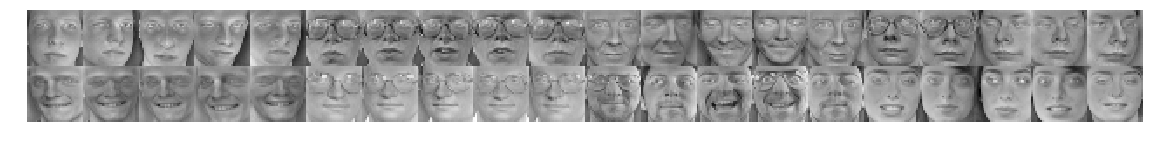

In [92]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train'] 
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE
# 1. Feature preprocessing
# begin answer
fea_Train = fea_Train - np.mean(fea_Train, axis=0)
fea_Test = fea_Test - np.mean(fea_Test, axis=0)
# end answer
from show_face import show_face
show_face(fea_Train)

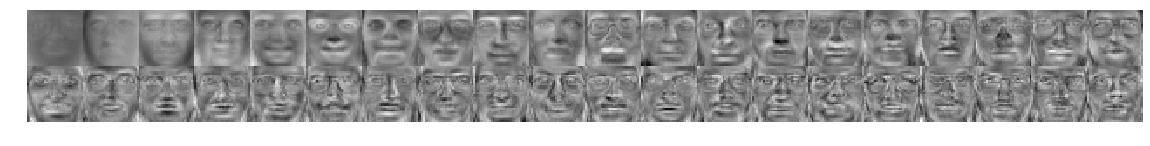

In [102]:
# 2. Run PCA
# begin answer
from pca import PCA
eigface, _ = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(eigface.T)
# end answer

When reduced dimensionality being 8, the test error is 0.255
When reduced dimensionality being 16, the test error is 0.17500000000000004
When reduced dimensionality being 32, the test error is 0.15500000000000003
When reduced dimensionality being 64, the test error is 0.135
When reduced dimensionality being 128, the test error is 0.135


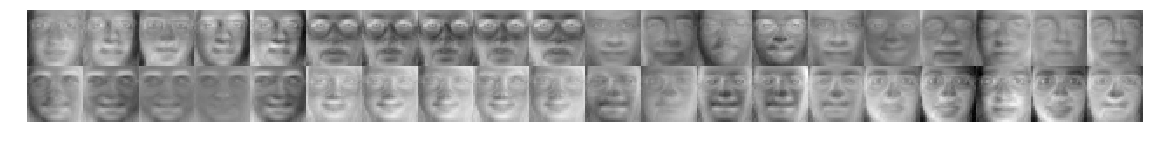

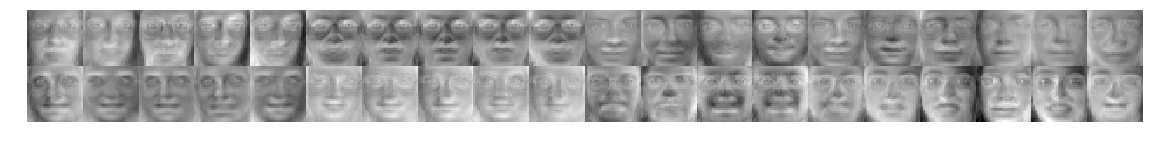

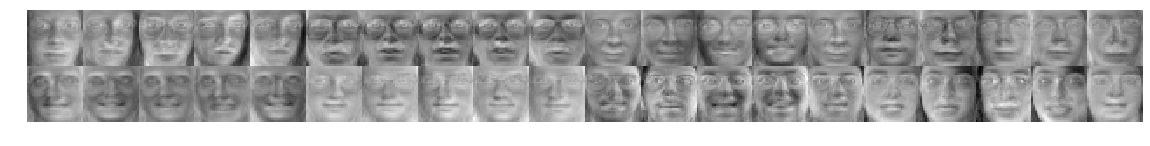

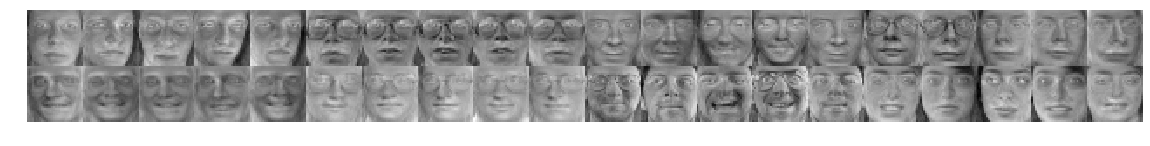

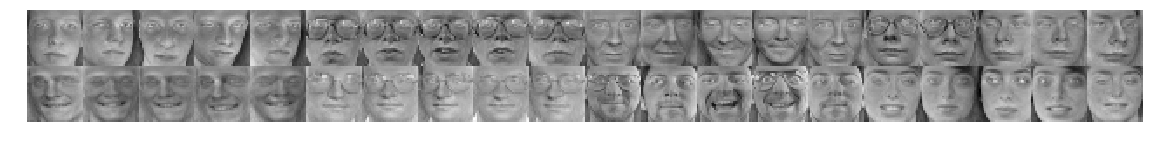

In [104]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
dimension = [8, 16, 32, 64, 128]
for d in dimension:
    eigvec = eigface[:,:d]
    reduced_fea_Train = np.dot(fea_Train, eigvec)
    reduced_fea_Test = np.dot(fea_Test, eigvec)
# end answer
# 5. Run KNN in low dimensional space
# begin answer
    pred = knn(reduced_fea_Test, reduced_fea_Train, gnd_Train, k=1)
    err = 1.0 - np.sum(pred==gnd_Test)/gnd_Test.shape[0]
    print("When reduced dimensionality being {}, the test error is {}".format(d, err))
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    r_fea = np.dot(reduced_fea_Train, eigvec.T)
    show_face(r_fea)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [109]:
from LDA import LDA

# Your code here
# begin answer
eigvec_LDA, _ = LDA(fea_Train,gnd_Train)
reduced_fea_Train = np.dot(fea_Train, eigvec_LDA)
reduced_fea_Test = np.dot(fea_Test, eigvec_LDA)
pred =  knn(reduced_fea_Test, reduced_fea_Train, gnd_Train, k=1)
err = 1.0 - np.sum(pred==gnd_Test)/gnd_Test.shape[0]
print("When using LDA, the test error is {}".format(err))
# end answer

When using LDA, the test error is 0.030000000000000027
